# Linear regression using scikit-learn

No caderno anterior, apresentamos a parametrização de um modelo linear.
Durante o exercício, você viu que parâmetros variáveis darão modelos diferentes
isso se ajustará melhor ou pior aos dados. Para avaliar quantitativamente este
bondade de ajuste, você implementou uma assim chamada métrica.

Ao fazer o aprendizado de máquina, você está interessado em selecionar o modelo que
irá minimizar o erro nos dados mais disponíveis.
Do exercício anterior, poderíamos implementar uma abordagem de força bruta,
variar os pesos e interceptar e selecionar o modelo com o menor erro.

Esperançosamente, este problema de encontrar os melhores valores de parâmetros (ou seja, que
resultar no menor erro) pode ser resolvido sem a necessidade de verificar cada
combinação potencial de parâmetros. Na verdade, este problema tem uma forma fechada
solução: os melhores valores dos parâmetros podem ser encontrados resolvendo uma equação. Esse
evita a necessidade de busca de força bruta. Esta estratégia é implementada em
scikit-learn.

In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Se você quiser uma visão geral mais aprofundada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC.</p>
</div>

In [2]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

A instância `linear_regression` irá armazenar os valores dos parâmetros no
atributos `coef_` e` intercept_`. Podemos verificar qual é o modelo ideal
encontrado é:

In [3]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610009

In [4]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077063

Usaremos o peso e a interceptação para traçar o modelo encontrado usando o
scikit-learn.

In [5]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

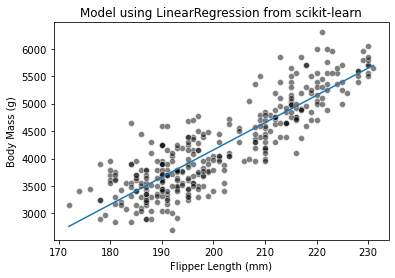

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

Na solução do exercício anterior, implementamos uma função para
calcule a qualidade do ajuste de um modelo. Na verdade, mencionamos duas métricas: (i)
o erro médio quadrático e (ii) o erro médio absoluto. Essas métricas são
implementado no scikit-learn e não precisamos usar nossa própria implementação.

Podemos primeiro calcular o erro quadrático médio.

In [7]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


Um modelo de regressão linear minimiza o erro quadrático médio no treinamento
definir. Isso significa que os parâmetros obtidos após o ajuste (ou seja, `coef_` e
`intercept_`) são os parâmetros ideais que minimizam o quadrado médio
erro. Em outras palavras, qualquer outra escolha de parâmetros produzirá um modelo com
um erro quadrático médio mais alto no conjunto de treinamento.

No entanto, o erro quadrático médio é difícil de interpretar. A média absoluta
o erro é mais intuitivo, pois fornece um erro na mesma unidade que o
um do alvo.

In [8]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


Um erro médio absoluto de 313 significa que, em média, nosso modelo comete um erro
de +/- 313 gramas ao prever a massa corporal de um pinguim com sua nadadeira
comprimento.

Neste notebook, você viu como treinar um modelo de regressão linear usando
scikit-learn.

# 📝 Exercício M4.02

O objetivo deste exercício é construir uma intuição sobre o que será o
valores dos parâmetros de um modelo linear quando a ligação entre os dados e o
o alvo não é linear.

Primeiro, geraremos esses dados não lineares.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> permite criar um gerador de números aleatórios que pode
ser usado posteriormente para obter resultados determinísticos.</p>
</div>

In [9]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

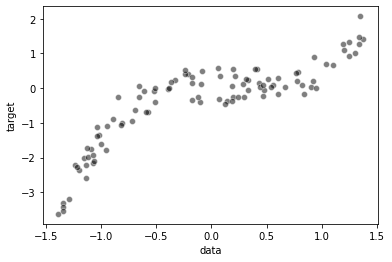

In [11]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

Observamos que a ligação entre os dados `dados` e o vetor` alvo` é
não linear. Por exemplo, `dados` podem representar os anos de
experiência (normalizada) e `meta` o salário (normalizado). Portanto, o
o problema aqui seria inferir o salário em função dos anos de experiência.

Usando a função `f` definida abaixo, encontre o` peso` e o
`interceptar` que você acha que levará a um bom modelo linear. Plote tanto o
dados e as previsões deste modelo. Calcule o erro quadrático médio como
Nós vamos.

In [12]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

In [13]:
# Write your code here.: plot both the data and the model predictions
# solution
predictions = f(data, weight=1.2, intercept=-0.2)

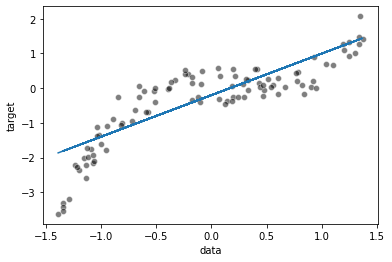

In [14]:
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
_ = ax.plot(data, predictions)

Treine um modelo de regressão linear e plote os dados e as previsões
do modelo. Calcule o erro quadrático médio com este modelo.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, por convenção <tt class = "docutils literal"> dados </tt> (também chamado de <tt class = "docutils literal"> X </tt> no scikit-learn
documentação) deve ser uma matriz 2D de forma <tt class = "docutils literal"> (n_samples, n_features) </tt>.
Se <tt class = "docutils literal"> dados </tt> for um vetor 1D, você precisará reformulá-lo em uma matriz com um
coluna única se o vetor representa um recurso ou uma única linha se o
vetor representa uma amostra. </p>
</div>

In [16]:
from sklearn.linear_model import LinearRegression

# solution
linear_regression = LinearRegression()
data_2d = data.reshape(-1, 1)
linear_regression.fit(data_2d, target)

LinearRegression()

Calcule as previsões do modelo de regressão linear e plote os dados e as previsões.

In [17]:
# solution
predictions = linear_regression.predict(data_2d)

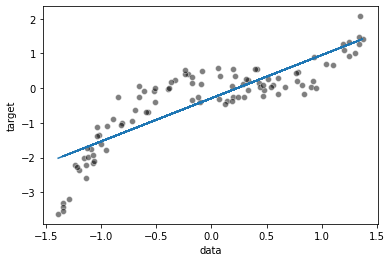

In [18]:
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
_ = ax.plot(data, predictions)